# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



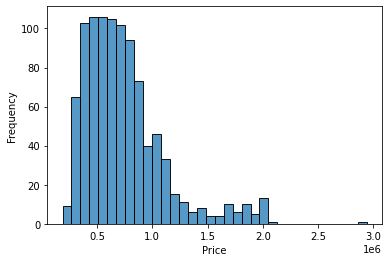

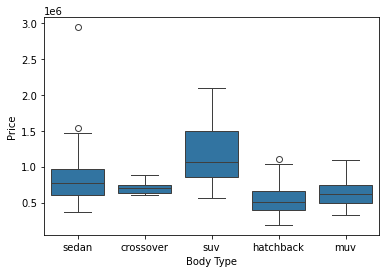

          variable   coefficient
0   Make_Year_2011 -1.474316e+18
1   Make_Year_2012 -1.474316e+18
2   Make_Year_2013 -1.474316e+18
3   Make_Year_2014 -1.474316e+18
4   Make_Year_2015 -1.474316e+18
5   Make_Year_2016 -1.474316e+18
6   Make_Year_2017 -1.474316e+18
7   Make_Year_2018 -1.474316e+18
8   Make_Year_2019 -1.474316e+18
9   Make_Year_2020 -1.474316e+18
10  Make_Year_2021 -1.474316e+18
11  Make_Year_2022 -1.474316e+18
12  No_of_Owners_1  1.474316e+18
13  No_of_Owners_2  1.474316e+18
14  No_of_Owners_3  1.474316e+18
RSquared1 is : 0.31318219710719464
RMSE1 is: 307093.48671539815
RSquared: 0.5423455530566699
RMSE: 250679.4174481375
               variable  coefficient
0        Make_Year_2012     0.005898
1        Make_Year_2013    -0.398717
2        Make_Year_2014     0.082300
3        Make_Year_2015     0.487077
4        Make_Year_2016     0.475654
..                  ...          ...
887   Mileage_Run_99495     0.152805
888  Seating_Capacity_5    -0.461254
889  Seating_Capacity_

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#1.
df = pd.read_csv("cars_hw.csv")
# df.head()
df['No_of_Owners'] = df['No_of_Owners'].str.extract('(\d+)').astype(int)
df.head()
# df.describe()
# print(max(df['No_of_Owners'])) #incase some had multiple digits, not just 0-9 since used \d to extract single digits

sns.histplot(df['Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=df, x='Body_Type', y='Price')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.show()

#2
df['Mileage_transform'] = np.log(df['Mileage_Run'])


#3
y = df['Price']
# x = df.loc[:,['Make_Year', 'Body_Type', 'mileage_transform'] ]
X = df.loc[:,['Make_Year', 'Mileage_Run'] ]
X = pd.get_dummies(X, columns=['Make_Year', 'Mileage_Run'], dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

#4

X2 = df.loc[:, ['Make_Year','No_of_Owners']]
X2 =  pd.get_dummies(X2, columns=['Make_Year', 'No_of_Owners'], dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X2,y, test_size=.2, random_state=100)
regression = linear_model.LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_hat = regression.predict(X_test)


results = pd.DataFrame({'variable': regression.feature_names_in_, 'coefficient': regression.coef_})
print(results)
rSquared = regression.score(X_test, y_test)
RMSE = np.sqrt(np.mean((y_test - y_hat) ** 2))

print('RSquared1 is :', rSquared)
print('RMSE1 is:', RMSE)

X = df.loc[:,['Make_Year', 'Mileage_Run'] ]
X = pd.get_dummies(X, columns=['Make_Year', 'Mileage_Run'], dtype=int)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)
regression1 = linear_model.LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_hat = regression1.predict(X_test)

results = pd.DataFrame({'variable': regression1.feature_names_in_, 'coefficient': regression1.coef_})
# print(results)
rSquared = regression1.score(X_test, y_test)
RMSE = np.sqrt(np.mean((y_test - y_hat) ** 2))

print('RSquared:', rSquared)
print('RMSE:', RMSE)

#Out of the 2 models the second one performed better, likely because mileage a car has is one of biggest factors that correlates to price




#5
# y = df['Price']
y = np.log(df['Price'])
X = df.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity'] ]
X = pd.get_dummies(X, columns=['Make_Year', 'Mileage_Run', 'Seating_Capacity'], dtype=int, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)


regression2 = linear_model.LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_hat = regression2.predict(X_test)
y_hat2 = regression2.predict(X_train)

results2 = pd.DataFrame({'variable': regression2.feature_names_in_, 'coefficient': regression2.coef_})
print(results2)
rSquared2 = regression2.score(X_test, y_test)
RMSE2 = np.sqrt(np.mean((y_test - y_hat) ** 2))

print('RSquared3 is:', rSquared2)
print('RMSE2 is:', RMSE2)

rSquared2 = regression2.score(X_train, y_train)
RMSE3 = np.sqrt(np.mean((y_train - y_hat2) ** 2))
print('RMSE3 is:', RMSE2)

# 6
# The more complex model was overfitting probably due to more complexity by adding the number fo seats (Seating _Capacity column) which may have complicated the model
# more and led to changes when applied with a car of certain age and with certain number of miles.

